<a href="https://colab.research.google.com/github/bipasha20/Fake_Currency_Detection/blob/main/Fake__Currency_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
db = pd.read_csv('/content/data_banknote_authentication.csv')
#pd.pandas.set_option('display.max_columns', None)

In [ ]:
#shape of the data
db.shape

(1371, 5)

In [ ]:
#the data entries of dataset
db.head(1371)

,3.6216,8.6661,-2.8073,-0.44699,0
215,1.32340,3.29640,0.23620,-0.119840,0
311,1.59020,2.29480,3.24030,0.184040,0
30,1.48840,3.62740,3.30800,0.489210,0
242,2.77440,6.85760,-1.06710,0.075416,0
136,5.03200,8.20260,-2.62560,-1.034100,0
...,...,...,...,...,...
1091,-1.55720,-9.88080,8.10880,-1.080600,1
1074,0.37637,-0.82358,0.78543,0.745240,1
1068,-1.44540,-8.43850,8.84830,0.968940,1
1208,-0.69078,-0.50077,-0.35417,0.474980,1


# **Missing values**

In [ ]:
# find the percentage of nan values present in a feature
#the list of all the features which have NaN values
features_with_na = [features for features in db.columns if db[features].isnull().sum() > 1]

# print all the features with the percentage of missing values they have
for features in features_with_na:
  print(features, np.round(db[features].isnull().mean(), 4), '% missing values')



# **A pair diagram to get an overview of the relationship between all the entities**

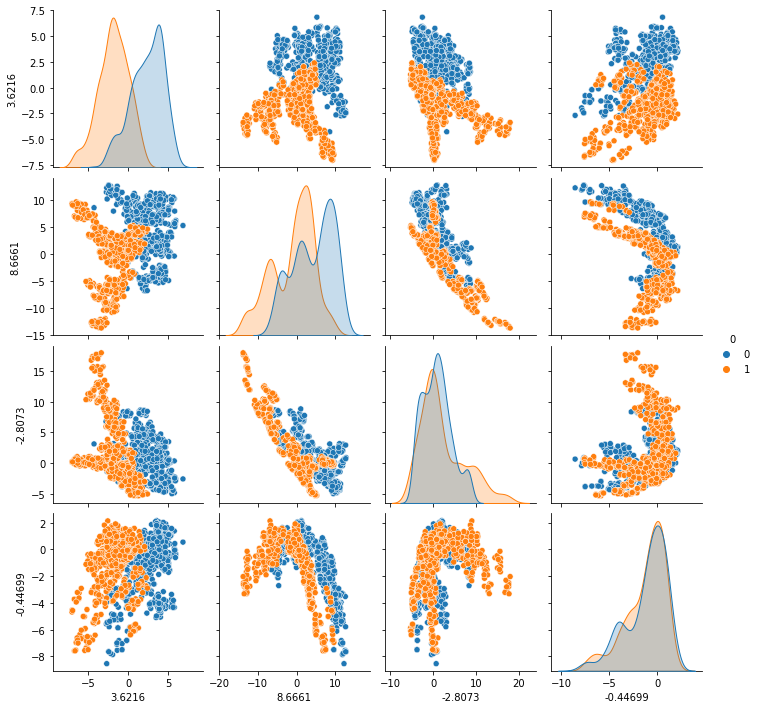

In [ ]:
#blue for genuine banknotes and orange for counterfeit banknotes
sns.pairplot(db, hue='0')
plt.show()

## **Observation**
The distribution of both variance and skewness appears to be quite different for the two target characteristics, while kurtosis and entropy appear to be more similar.
There are clear linear and nonlinear trends in the input features.
Some characteristics seem to be correlated.
Some features seem to separate genuine and fake banknotes quite well.

# **Checking if our data is balanced against the target values**

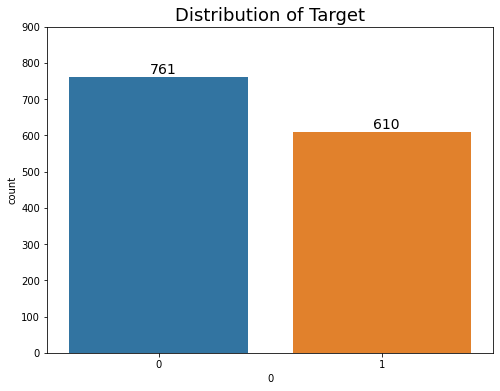

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=db['0'])
target_count = db['0'].value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

# **Data Processing**

**Balancing Data**

In [ ]:
#randomly deleting 152 observations of actual banknotes
nb_to_delete = target_count[0] - target_count[1]
db = db.sample(frac=1, random_state=42).sort_values(by='0')
db = db[nb_to_delete:]
print(db['0'].value_counts())

1    610
0    610
Name: 0, dtype: int64


**Dividing the data into training and test sets:**

In [ ]:
x = db.loc[:, db.columns != '0']
y = db.loc[:, db.columns == '0']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Standardizing the data**

In [ ]:
#using the StandardScalar method provided by Scikit-learn
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

# **Logistic Regression**

In [ ]:
#fiting the data on the Logistic Regression model to train the model
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Simulating the prediction of a single banknote:**

In [ ]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')

#inspecting the banknote probabilities of belonging to each target class
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.65259056 0.34740944]


**Result:**

The Banknotes are authentic.
